In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('parkinsons.csv')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
np.array(df.head(1))

array([['phon_R01_S01_1', 119.992, 157.302, 74.997, 0.00784, 7e-05,
        0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313,
        0.02971, 0.06545, 0.02211, 21.033, 1, 0.414783, 0.815285,
        -4.813031, 0.266482, 2.301442, 0.284654]], dtype=object)

In [6]:
X = df.drop(['status','name'],axis = 1)
y = df['status']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))

In [9]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [10]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

In [11]:
XGB_model.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
preds = XGB_model.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [15]:
accuracy_score(y_test,preds)*100

94.87179487179486

In [16]:
from sklearn.metrics import plot_confusion_matrix

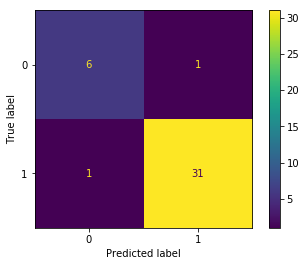

In [17]:
plot_confusion_matrix(XGB_model,x_test,y_test,cmap = 'viridis')

In [18]:
import joblib

In [19]:
joblib.dump(XGB_model,'XGB_model.pkl')

['XGB_model.pkl']

In [20]:
joblib.dump(scaler,'MinMaxScaler.pkl')

['MinMaxScaler.pkl']

In [21]:
list(X.columns)

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [22]:
joblib.dump(list(X.columns),'col_names.pkl')

['col_names.pkl']

In [23]:
new_columns = joblib.load('col_names.pkl')

In [24]:
new_columns

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [25]:
load_model = joblib.load('XGB_model.pkl')

In [26]:
result = load_model.predict(np.array([[119.992,157.302,74.997,0.00784,7e-05,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]]))

In [27]:
print('Your status is ',result)
print('You have parkinson disease')

Your status is  [1]
You have parkinson disease


In [30]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(XGB_model,f)